

# Rizal Maulana Darmawan (4101422039)



In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv("produk_elektronik.csv")

# Nomor 1 Cek Tipe Data

Menampilkan informasi tipe data setiap kolom dan informasi missing values

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


# Nomor 2 Missing Value

In [100]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [101]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


**a**. Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak 550 baris.
Diperoleh informasi yaitu terdapat missing values pada kolom berikut:
1. kolom harga sebanyak 30 missing values
2. kolom rating sebanyak 50 missing values
3. kolom jumlah ulasan sebanyak 20 missing values




**b**. Missing values dalam data dapat memengaruhi akurasi dan interpretasi hasil analisis. Jika data yang hilang tidak acak, analisis bisa menjadi bias dan menggambarkan hasil yang tidak sesuai kenyataan. Selain itu, missing values mengurangi jumlah sampel yang tersedia, menyebabkan berkurangnya kekuatan statistik dan meningkatkan kemungkinan kesalahan prediksi. Banyak algoritma analisis tidak dapat memproses data yang hilang, sehingga perlu penanganan khusus. Jika tidak ditangani dengan benar, hasil analisis dapat menyesatkan.



**c**. Untuk kolom harga saya memilih metode median imputation karena metode ini tahan terhadap outlier, cocok untuk data dengan distribusi asimetris, saya mengantisipasi data harga yang mungkin tidak berdistribusi normal sehingga saya memilih metode tersebut.

Untuk kolom rating saya memilih metode median imputation karena rating umumnya memiliki skala terbatas (misalnya 1-5) dan sering kali tidak berdistribusi normal, sehingga median memberikan estimasi yang lebih representatif.

Untuk kolom jumlah ulasan saya memilih zero imputation (mengisi dengan nol) karena saya berasumsi bahwa ketiadaan ulasan menunjukkan bahwa produk belum mendapat perhatian, sehingga metode tersebut adalah pendekatan yang logis.

**d.** Menangani Missing Value

# 1. Kolom Harga

In [102]:
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [103]:
np.sum(data['harga'].isnull())

30

Harga biasanya berupa data numerik kontinu, sehingga metode Median Imputation efektif untuk mengisi nilai yang hilang.

Saya memilih metode tersebut karena metode ini tahan terhadap outlier, cocok untuk data dengan distribusi asimetris, mempertahankan karakteristik data, dan mengurangi bias imputasi. Median lebih stabil dibandingkan mean karena tidak terpengaruh oleh nilai ekstrem, sehingga memberikan estimasi yang lebih akurat jika harga memiliki variasi besar atau distribusi miring (skewed). Selain itu, metode ini menjaga pola dan struktur data, terutama jika terdapat perbedaan harga yang signifikan di antara kategori produk, serta memastikan hasil analisis tidak bias.

In [104]:
data['harga']=data['harga'].fillna(data['harga'].median())

In [105]:
np.sum(data['harga'].isnull())

0

# 2. Kolom Rating

In [106]:
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [107]:
np.sum(data['rating'].isnull())

50

Rating biasanya memiliki skala terbatas (contoh: 1-5), dan metode median imputation lebih stabil terhadap outlier atau distribusi asimetris.

Saya memilih metode median imputation karena beberapa alasan. Pertama, median lebih tahan terhadap outlier dibandingkan mean, sehingga hasil imputasi tidak terpengaruh oleh rating ekstrem yang dapat memengaruhi akurasi analisis. Kedua, rating umumnya memiliki skala terbatas (misalnya 1-5) dan sering kali tidak berdistribusi normal, sehingga median memberikan estimasi yang lebih representatif. Selain itu, metode ini menjaga keseimbangan data tanpa menggeser nilai ke arah tertentu, sehingga mengurangi bias dan menghasilkan imputasi yang mencerminkan kecenderungan utama dalam distribusi rating.

In [108]:
data['rating']=data['rating'].fillna(data['rating'].median())

In [109]:
np.sum(data['harga'].isnull())

0

# 3. Kolom Jumlah Ulasan

In [110]:
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [111]:
np.sum(data['jumlah_ulasan'].isnull())

20

Saya memilih metode zero imputation karena beberapa alasan. Pertama, ketiadaan nilai pada kolom jumlah ulasan dapat diinterpretasikan sebagai tidak adanya ulasan, sehingga pengisian dengan nol mencerminkan kondisi nyata. Kedua, metode ini sederhana dan efisien tanpa memerlukan perhitungan kompleks, cocok untuk dataset besar. Ketiga, zero imputation mempertahankan struktur data dan memungkinkan penggunaan seluruh dataset dalam analisis tanpa kehilangan informasi. Selain itu, metode ini membantu menjaga konsistensi data, terutama jika jumlah ulasan menunjukkan aktivitas atau popularitas suatu produk.

In [112]:
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(0)

In [113]:
np.sum(data['jumlah_ulasan'].isnull())

0

In [114]:
np.sum(data.isnull())

,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


# Nomor 3 Outlier

Indentifikasi outlier dengan Boxplot

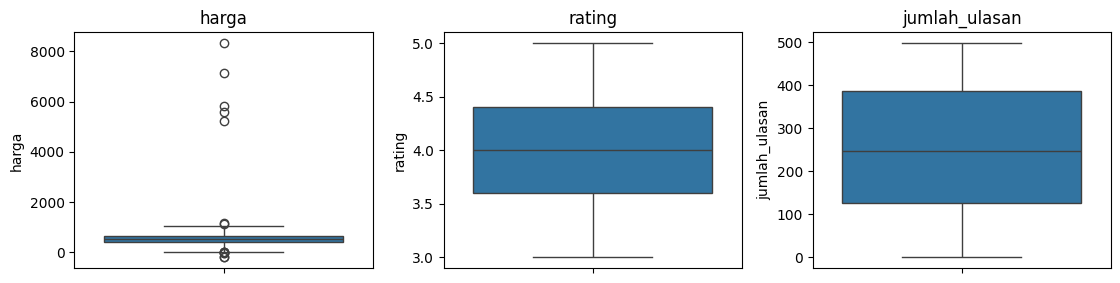

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['harga', 'rating', 'jumlah_ulasan']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Identifikasi outlier dengan IQR

In [117]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


**a.** Berdasarkan hasil di atas, diperoleh kolom harga terdapat 14 outlier dan kolom lainnya tidak terdapat outlier

**b.** Outlier adalah nilai ekstrem yang menyimpang dari data lain dan dapat memengaruhi hasil analisis. Kehadirannya dapat menyebabkan ukuran pusat seperti mean menjadi bias, memperbesar variabilitas data, dan mengurangi akurasi model prediktif. Selain itu, outlier dapat menyebabkan kesalahan interpretasi dalam visualisasi dan memengaruhi hasil uji statistik, menghasilkan kesimpulan yang tidak akurat. Penanganan yang tepat penting untuk memastikan hasil analisis akurat dan dapat diandalkan.

**c.** Saya menggunakan metode winsorizing untuk menangani outliers pada kolom harga karena metode ini membatasi nilai ekstrem tanpa menghapus data, sehingga ukuran sampel tetap terjaga. Winsorizing juga membantu menjaga distribusi asli data dan mengurangi pengaruh outlier terhadap ukuran statistik seperti mean dan varians, membuat hasil analisis lebih stabil dan akurat. Metode ini sangat cocok untuk data harga, di mana outlier sering muncul akibat kesalahan input atau variasi ekstrem.

**d.** Menangani outliers dengan metode Winsorizing

In [118]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

for col in num_cols:
    winsorize_iqr(data, col)

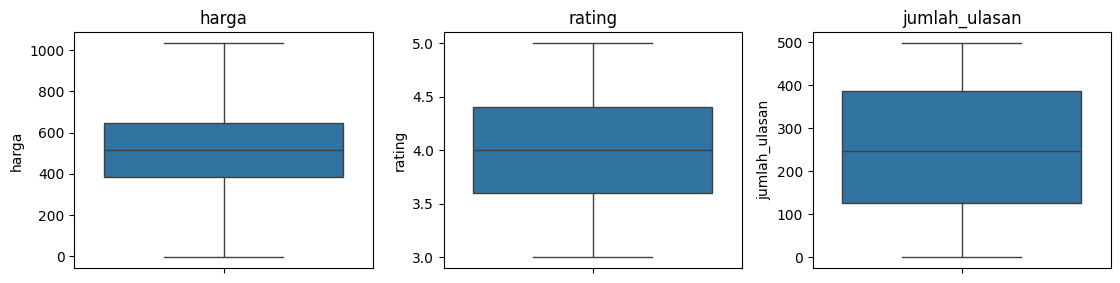

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['harga', 'rating', 'jumlah_ulasan']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [120]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 0 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


# Nomor 4 Encoding

**a.** Kolom yang memerlukan encoding adalah kolom kategori dan kolom negara asal, karena kolom tersebut memuat data kategorik

**b.** Saya memilih One-Hot Encoding karena metode ini cocok untuk data nominal seperti kategori produk dan negara asal yang tidak memiliki hubungan ordinal. Dengan One-Hot Encoding, setiap kategori diubah menjadi vektor biner, sehingga mencegah model menganggap ada hubungan atau peringkat antar kategori, dan meningkatkan akurasi dalam algoritma berbasis linear atau jarak seperti Logistic Regression dan KNN.

**Kolom kategori**

In [121]:
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [122]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[['kategori']])
encoded_df = pd.DataFrame(encoded.toarray().astype(int), columns=encoder.get_feature_names_out(['kategori']))

In [125]:
print(encoded_df)

     kategori_Camera  kategori_Headphone  kategori_Laptop  \
0                  0                   0                0   
1                  0                   1                0   
2                  0                   0                0   
3                  0                   1                0   
4                  0                   1                0   
..               ...                 ...              ...   
545                0                   0                1   
546                0                   1                0   
547                0                   0                0   
548                0                   0                1   
549                0                   0                0   

     kategori_Smartphone  kategori_Smartwatch  kategori_Tablet  
0                      0                    1                0  
1                      0                    0                0  
2                      0                    0                1  
3      

In [126]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['kategori'] = encoder.fit_transform(data['kategori'])
print(data['kategori'])

0      4
1      1
2      5
3      1
4      1
      ..
545    2
546    1
547    5
548    2
549    5
Name: kategori, Length: 550, dtype: int64


In [127]:
data['kategori'].unique()

array([4, 1, 5, 2, 0, 3])

**Kolom Negara Asal**

In [128]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [129]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[['negara_asal']])
encoded_df = pd.DataFrame(encoded.toarray().astype(int), columns=encoder.get_feature_names_out(['negara_asal']))

In [130]:
print(encoded_df)

     negara_asal_Canada  negara_asal_China  negara_asal_France  \
0                     0                  0                   0   
1                     1                  0                   0   
2                     1                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
..                  ...                ...                 ...   
545                   0                  1                   0   
546                   0                  0                   0   
547                   0                  0                   0   
548                   0                  0                   0   
549                   0                  0                   0   

     negara_asal_Germany  negara_asal_India  negara_asal_Japan  \
0                      0                  0                  1   
1                      0                  0                  0   
2        

In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['negara_asal'] = encoder.fit_transform(data['negara_asal'])
print(data['negara_asal'])

0      5
1      0
2      0
3      6
4      6
      ..
545    1
546    8
547    4
548    3
549    3
Name: negara_asal, Length: 550, dtype: int64


In [133]:
data['negara_asal'].unique()

array([5, 0, 6, 2, 8, 3, 1, 4, 7])

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    int64  
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 30.2+ KB
